<a href="https://colab.research.google.com/github/VishalSingh1703/ML_Projects/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import torch
import torch.functional as F
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
data = pd.read_csv('VAH25.csv')
data.head()

,time_s,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns
0,0.000000,3.538316,1505.0242,0.000000,0.000000,0.0,0.0,19.981642,0.0,0.0
1,10.000000,3.545290,1505.4182,0.014815,4.178689,0.0,0.0,19.965868,0.0,0.0
2,20.000001,3.549703,1504.2361,0.029648,8.357410,0.0,0.0,19.997417,0.0,0.0
3,30.000001,3.552974,1505.2212,0.044495,12.536091,0.0,0.0,20.391788,0.0,0.0
4,40.000002,3.555496,1504.6300,0.059352,16.714694,0.0,0.0,20.147278,0.0,0.0


In [4]:
data.describe()

,time_s,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns
count,1.667500e+05,166750.000000,166750.000000,166750.000000,166750.000000,166750.000000,166750.000000,166750.000000,166749.000000,166749.000000
mean,7.943096e+05,3.785031,-995.439729,6.913248,352.216197,-3.672696,963.710865,23.252814,32.704040,4.198070
std,5.199030e+05,0.349691,3209.590424,1.656184,658.577762,3.359279,895.592765,4.018442,52.146594,2.307452
min,0.000000e+00,2.500003,-18460.988000,0.000000,0.000000,-11.026996,0.000000,2.000000,0.000000,0.000000
25%,3.508364e+05,3.625328,-596.038880,7.029762,0.000000,-6.236873,0.000000,20.478550,1.000000,3.000000
50%,6.994874e+05,3.829111,-595.053890,7.082758,0.000000,-3.112415,791.907479,21.196302,3.000000,5.000000
75%,1.256925e+06,4.059502,0.000000,7.150213,175.134502,0.000000,1729.229812,26.307346,45.000000,6.000000
max,1.763247e+06,4.200841,3008.316900,11.854009,3050.032471,0.000000,3027.018046,46.648975,186.000000,9.000000


In [52]:
X = data[['time_s', 'Ecell_V', 'I_mA', 'EnergyDischarge_W_h', 'Temperature__C']]
y = data['QDischarge_mA_h']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(min(X_train['time_s']), min(X_train['Ecell_V']), min(X_train['I_mA']), min(X_train['EnergyDischarge_W_h']))
print(max(X_train['time_s']), max(X_train['Ecell_V']), max(X_train['I_mA']), max(X_train['EnergyDischarge_W_h']))

10.0000004749745 2.5000029 -18460.988 -11.0269963060973
1763247.3724241 4.200841 3008.3169 0.0


In [53]:
y_train.describe()

,QDischarge_mA_h
count,133400.000000
mean,963.302008
std,895.980378
min,0.000000
25%,0.000000
50%,789.669349
75%,1729.134924
max,3027.018046


In [67]:
# Scaling input features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Scaling target variable
scaler_y = StandardScaler()  # Use a separate scaler for y
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [68]:
print(X_train_tensor[:, 0].min(), X_train_tensor[:, 1].min(), X_train_tensor[:, 2].min(), X_train_tensor[:, 3].min())
print(X_train_tensor[:, 0].max(), X_train_tensor[:, 1].max(), X_train_tensor[:, 2].max(), X_train_tensor[:, 3].max())
print(y_train_scaled[:, 0].min())
print(y_test_scaled[:, 0].max())
print(X_train_tensor.mean(dim=0))
print(X_train_tensor.std(dim=0))

tensor(-1.5238) tensor(-3.6737) tensor(-5.4683) tensor(-2.1889)
tensor(1.8644) tensor(1.1879) tensor(1.2521) tensor(1.0924)
-1.0751414231255227
2.3033135798426287
tensor([ 0.0000e+00,  2.5164e-09,  5.7192e-10, -9.7512e-09, -8.0069e-10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [58]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x


In [59]:
input_size = X_train.shape[1]  # Get the number of input features
model = FeedForwardNN(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [60]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

In [63]:
epochs = 50
batch_size = 32
num_batches = len(X_train_tensor) // batch_size

train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]

        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_losses.append(epoch_loss / num_batches)

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_pred = model(X_test_tensor)
        test_loss = criterion(test_pred, y_test_tensor).item()
        test_losses.append(test_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.8f}, Test Loss: {test_losses[-1]:.8f}")


Epoch 1/50, Train Loss: 0.00005603, Test Loss: 0.00001826
Epoch 2/50, Train Loss: 0.00003698, Test Loss: 0.00002270
Epoch 3/50, Train Loss: 0.00002851, Test Loss: 0.00000856
Epoch 4/50, Train Loss: 0.00002323, Test Loss: 0.00000858
Epoch 5/50, Train Loss: 0.00002182, Test Loss: 0.00000930
Epoch 6/50, Train Loss: 0.00002006, Test Loss: 0.00000524
Epoch 7/50, Train Loss: 0.00001734, Test Loss: 0.00000623
Epoch 8/50, Train Loss: 0.00001633, Test Loss: 0.00001657
Epoch 9/50, Train Loss: 0.00001501, Test Loss: 0.00000871
Epoch 10/50, Train Loss: 0.00001372, Test Loss: 0.00000433
Epoch 11/50, Train Loss: 0.00001279, Test Loss: 0.00000417
Epoch 12/50, Train Loss: 0.00001345, Test Loss: 0.00000700
Epoch 13/50, Train Loss: 0.00001171, Test Loss: 0.00000395
Epoch 14/50, Train Loss: 0.00001186, Test Loss: 0.00000291
Epoch 15/50, Train Loss: 0.00001127, Test Loss: 0.00000255
Epoch 16/50, Train Loss: 0.00001030, Test Loss: 0.00000238
Epoch 17/50, Train Loss: 0.00001014, Test Loss: 0.00000267
Epoch 

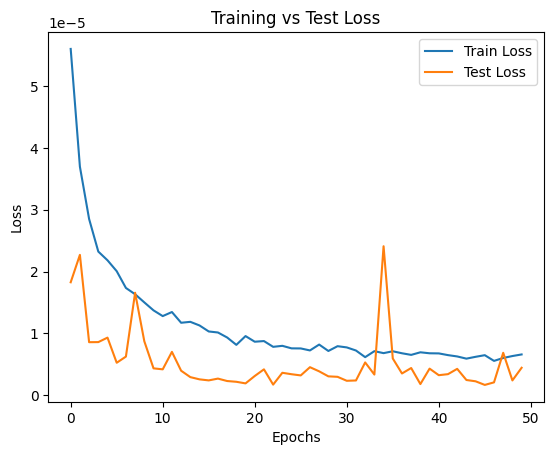

In [64]:
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.plot(range(epochs), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Test Loss")
plt.show()


In [70]:
import numpy as np
import torch

y_test_np = np.array(y_test)  # Convert Pandas Series/DataFrame to NumPy array

# Inference
idx = np.random.randint(0, len(X_test_tensor))
sample_input = X_test_tensor[idx].unsqueeze(0)  # Add batch dimension

model.eval()
with torch.no_grad():
    predicted_value_scaled = model(sample_input).item()

# Convert back to original scale
predicted_value = scaler_y.inverse_transform([[predicted_value_scaled]])[0][0]
actual_value = y_test.iloc[idx]  # Get actual value in original scale

print(f"Sample Input: {X_test[idx]}")  # Now this should work correctly
print(f"Actual Value: {actual_value}")
print(f"Predicted Value: {predicted_value}")


Sample Input: [ 1.18166937 -1.94303137  0.12420766 -1.72151488 -0.38634285]
Actual Value: 2538.91674403264
Predicted Value: 2538.111868228426


In [72]:
y_test_np = np.array(y_test)  # Convert Pandas Series/DataFrame to NumPy array

# Inference
idx = np.random.randint(0, len(X_test_tensor))
sample_input = X_test_tensor[idx].unsqueeze(0)  # Add batch dimension

model.eval()
with torch.no_grad():
    predicted_value_scaled = model(sample_input).item()

# Convert back to original scale
predicted_value = scaler_y.inverse_transform([[predicted_value_scaled]])[0][0]
actual_value = y_test.iloc[idx]  # Get actual value in original scale

print(f"Sample Input: {X_test[idx]}")  # Now this should work correctly
print(f"Actual Value: {actual_value}")
print(f"Predicted Value: {predicted_value}")


Sample Input: [-0.83466664 -1.79199837  0.12383763 -1.79760173 -0.45893025]
Actual Value: 2597.54709886865
Predicted Value: 2595.6339524804125


In [73]:
class ImprovedFFN(nn.Module):
    def __init__(self, input_size):
        super(ImprovedFFN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.bn1 = nn.BatchNorm1d(32)  # Batch Normalization
        self.dropout1 = nn.Dropout(0.3)  # Dropout Regularization

        self.fc2 = nn.Linear(32, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.2)

        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)

        x = self.fc4(x)
        return x


In [76]:
epochs = 50
batch_size = 32
num_batches = len(X_train_tensor) // batch_size

train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]

        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_losses.append(epoch_loss / num_batches)


    model.eval()
    with torch.no_grad():
        test_pred = model(X_test_tensor)
        test_loss = criterion(test_pred, y_test_tensor).item()
        test_losses.append(test_loss)


    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.8f}, Test Loss: {test_losses[-1]:.8f}")


Epoch 1/50, Train Loss: 0.00000540, Test Loss: 0.00000319
Epoch 2/50, Train Loss: 0.00000566, Test Loss: 0.00000375
Epoch 3/50, Train Loss: 0.00000584, Test Loss: 0.00000232
Epoch 4/50, Train Loss: 0.00000614, Test Loss: 0.00002926
Epoch 5/50, Train Loss: 0.00000529, Test Loss: 0.00000375
Epoch 6/50, Train Loss: 0.00000597, Test Loss: 0.00000132
Epoch 7/50, Train Loss: 0.00000527, Test Loss: 0.00000532
Epoch 8/50, Train Loss: 0.00000570, Test Loss: 0.00000253
Epoch 9/50, Train Loss: 0.00000531, Test Loss: 0.00000272
Epoch 10/50, Train Loss: 0.00000570, Test Loss: 0.00000177
Epoch 11/50, Train Loss: 0.00000526, Test Loss: 0.00000442
Epoch 12/50, Train Loss: 0.00000568, Test Loss: 0.00001146
Epoch 13/50, Train Loss: 0.00000470, Test Loss: 0.00000136
Epoch 14/50, Train Loss: 0.00000514, Test Loss: 0.00000133
Epoch 15/50, Train Loss: 0.00000474, Test Loss: 0.00000695
Epoch 16/50, Train Loss: 0.00000484, Test Loss: 0.00000507
Epoch 17/50, Train Loss: 0.00000459, Test Loss: 0.00000343
Epoch 

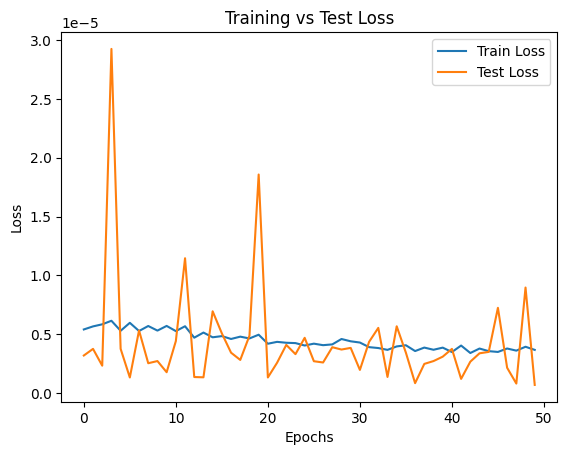

In [77]:
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.plot(range(epochs), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Test Loss")
plt.show()


In [78]:
y_test_np = np.array(y_test)  # Convert Pandas Series/DataFrame to NumPy array

# Inference
idx = np.random.randint(0, len(X_test_tensor))
sample_input = X_test_tensor[idx].unsqueeze(0)  # Add batch dimension

model.eval()
with torch.no_grad():
    predicted_value_scaled = model(sample_input).item()

# Convert back to original scale
predicted_value = scaler_y.inverse_transform([[predicted_value_scaled]])[0][0]
actual_value = y_test.iloc[idx]  # Get actual value in original scale

print(f"Sample Input: {X_test[idx]}")  # Now this should work correctly
print(f"Actual Value: {actual_value}")
print(f"Predicted Value: {predicted_value}")


Sample Input: [-0.21002367  0.80011224  0.12389928  0.82607355 -0.65707703]
Actual Value: 218.679053067152
Predicted Value: 218.9974136132255
